In [1]:
# Import functions from scripts/eda.py
import sys, os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

sys.path.append("../scripts") 
from data_loader import load_stock_data
from eda import check_missing_values, handle_missing_values, detect_outliers, remove_outliers
from eda import get_headline_length_stats, count_articles_per_publisher, analyze_publication_trends, plot_trends

In [3]:
# Load dataset
file_path = "../data/raw_analyst_ratings.csv"
df = load_stock_data(file_path)

In [4]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
# Check for missing values
print("Missing Values:")
print(check_missing_values(df))

Missing Values:
Series([], dtype: int64)


In [6]:
# Handle missing values
df_cleaned = handle_missing_values(df, strategy="fill", fill_value={"headline": "Unknown"})

In [7]:
# Detect outliers in headline length
df_cleaned['headline_length'] = df_cleaned['headline'].apply(len)
outliers = detect_outliers(df_cleaned, column="headline_length", method="iqr")
print("\nOutliers in Headline Length:")
print(outliers)


Outliers in Headline Length:
         Unnamed: 0                                           headline  \
20               20  Shares of several healthcare companies are tra...   
21               21  Shares of several healthcare companies are tra...   
26               26  Shares of several companies in the auto dealer...   
27               27  Shares of several healthcare companies are tra...   
30               30  Int'l. Air Transport Authority Chief Economist...   
...             ...                                                ...   
1406776     1413297  UPDATE: Zumiez Raises Q4 EPS Guidance from $0....   
1406828     1413349  UPDATE: Zumiez Inc. Raises Q2 EPS Guidance fro...   
1406871     1413392  UPDATE: Zumiez Reports September 2013 Sales Re...   
1407266     1413787  Chinese Nano-Cap Momentum Stocks Sharply Highe...   
1407278     1413799  Auto Parts Suppliers Trading Up: China Zenix 9...   

                                                       url          publisher  \


In [8]:
# Remove outliers
df_cleaned = remove_outliers(df_cleaned, column="headline_length", method="iqr")
print("\nData after Removing Outliers:")
print(df_cleaned.head())


Data after Removing Outliers:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  headline_length  
0  2020-06-05 10:30:54-04:00     A               39  
1

In [10]:
#1 Descriptive Statistics: Headline Length
# Calculate headline lengths
df['headline_length'] = df['headline'].str.len()

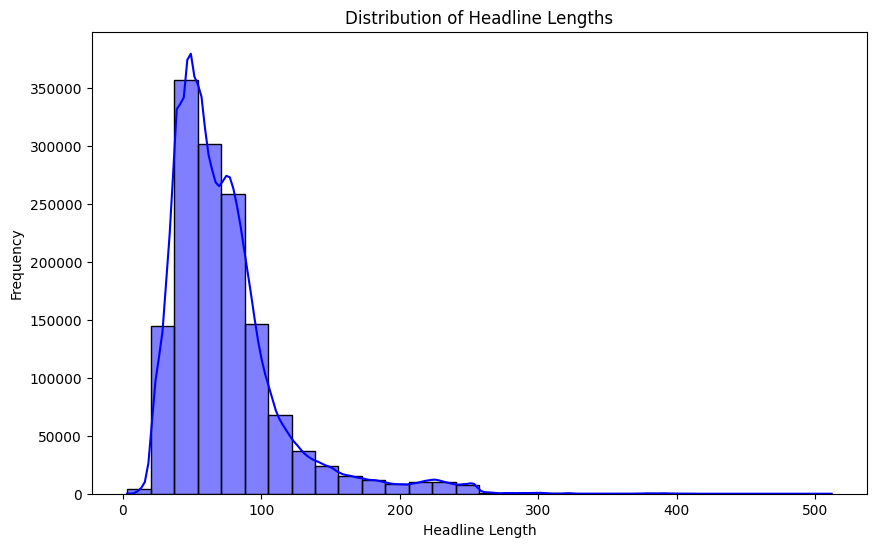

In [13]:
# Plot distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color="blue")
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()

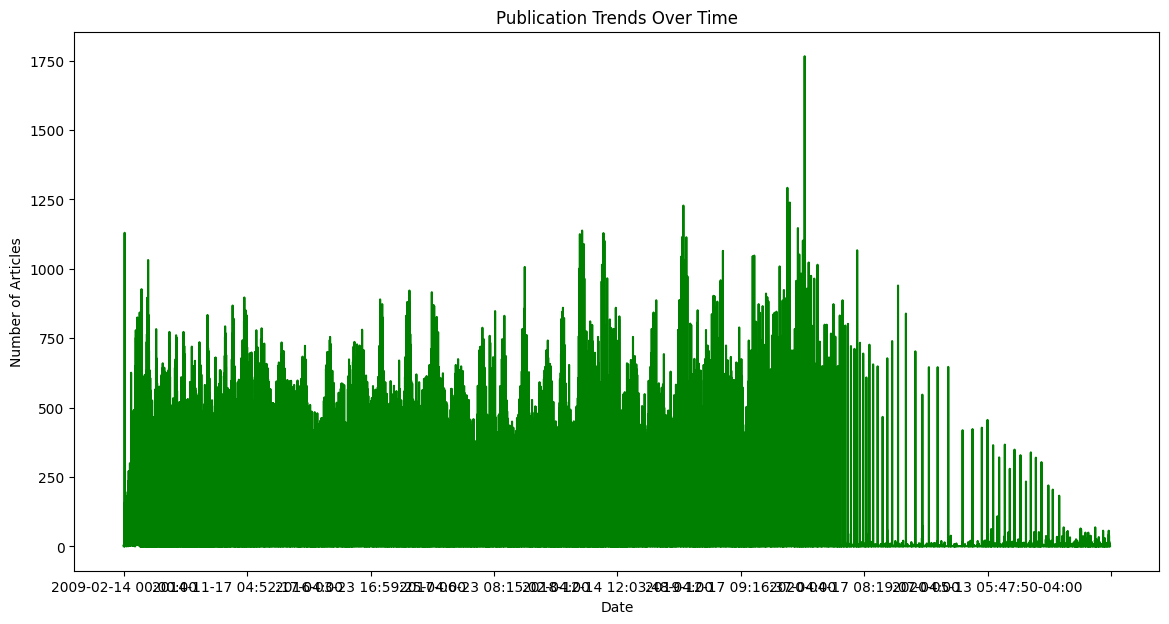

In [18]:

# Plot the number of articles published over time
plt.figure(figsize=(14, 7))
df.groupby('date').size().plot(kind='line', color="green")
plt.title("Publication Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()